In [1]:
#import libraries
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bike_df = pd.read_csv('bike.csv')

In [3]:
bike_df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
# getting rid of unneccessary columns
unneccessary_cols = ['dteday','casual','registered','instant']
bike_df.drop(labels=unneccessary_cols,axis=1,inplace=True)

In [6]:
bike_df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [7]:
# splitting data
from sklearn.model_selection import train_test_split
X = bike_df.drop('cnt',axis=1).values
y = bike_df['cnt'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [0]:
# scaling data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# create neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [9]:
model.fit(X_train,y_train,epochs=1000,verbose=1)

Train on 12165 samples
Epoch 1/1000
12165/12165 [==============================] - 1s 65us/sample - loss: 39909.2718
Epoch 2/1000
12165/12165 [==============================] - 0s 23us/sample - loss: 25316.5087
Epoch 3/1000
12165/12165 [==============================] - 0s 22us/sample - loss: 22970.5719
Epoch 4/1000
12165/12165 [==============================] - 0s 23us/sample - loss: 20255.5641
Epoch 5/1000
12165/12165 [==============================] - 0s 24us/sample - loss: 17833.2857
Epoch 6/1000
12165/12165 [==============================] - 0s 23us/sample - loss: 16705.6535
Epoch 7/1000
12165/12165 [==============================] - 0s 22us/sample - loss: 16168.0862
Epoch 8/1000
12165/12165 [==============================] - 0s 23us/sample - loss: 15852.6899
Epoch 9/1000
12165/12165 [==============================] - 0s 23us/sample - loss: 15591.8077
Epoch 10/1000
12165/12165 [==============================] - 0s 24us/sample - loss: 15452.4965
Epoch 11/1000
12165/12165 [=========

12165/12165 [==============================] - 0s 24us/sample - loss: 13502.6570
Epoch 87/1000
12165/12165 [==============================] - 0s 25us/sample - loss: 13510.4916
Epoch 88/1000
12165/12165 [==============================] - 0s 26us/sample - loss: 13494.6696
Epoch 89/1000
12165/12165 [==============================] - 0s 25us/sample - loss: 13459.6343
Epoch 90/1000
12165/12165 [==============================] - 0s 25us/sample - loss: 13477.2089
Epoch 91/1000
12165/12165 [==============================] - 0s 24us/sample - loss: 13448.6170
Epoch 92/1000
12165/12165 [==============================] - 0s 25us/sample - loss: 13459.9290
Epoch 93/1000
12165/12165 [==============================] - 0s 26us/sample - loss: 13481.0983
Epoch 94/1000
12165/12165 [==============================] - 0s 25us/sample - loss: 13483.2646
Epoch 95/1000
12165/12165 [==============================] - 0s 25us/sample - loss: 13416.8378
Epoch 96/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 31us/sample - loss: 12926.0776
Epoch 172/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 12833.1483
Epoch 173/1000
12165/12165 [==============================] - 0s 39us/sample - loss: 12753.5951
Epoch 174/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 12671.7912
Epoch 175/1000
12165/12165 [==============================] - 0s 31us/sample - loss: 12571.6405
Epoch 176/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 12452.8401
Epoch 177/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 12311.4373
Epoch 178/1000
12165/12165 [==============================] - 0s 32us/sample - loss: 12179.1361
Epoch 179/1000
12165/12165 [==============================] - 0s 39us/sample - loss: 11898.5878
Epoch 180/1000
12165/12165 [==============================] - 1s 52us/sample - loss: 11701.5377
Epoch 181/1000
12165/12165 [===========================

12165/12165 [==============================] - 0s 29us/sample - loss: 5289.3708
Epoch 258/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 5355.1422
Epoch 259/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 5226.7839
Epoch 260/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 5152.2508
Epoch 261/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 5106.3575
Epoch 262/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 5190.8237
Epoch 263/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 5091.5902
Epoch 264/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 5052.4228
Epoch 265/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 5005.8313
Epoch 266/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 4965.0249
Epoch 267/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 27us/sample - loss: 3539.8927
Epoch 344/1000
12165/12165 [==============================] - 0s 26us/sample - loss: 3727.4817
Epoch 345/1000
12165/12165 [==============================] - 0s 27us/sample - loss: 3916.9214
Epoch 346/1000
12165/12165 [==============================] - 0s 27us/sample - loss: 3501.8141
Epoch 347/1000
12165/12165 [==============================] - 0s 26us/sample - loss: 3511.9037
Epoch 348/1000
12165/12165 [==============================] - 0s 27us/sample - loss: 3545.7525
Epoch 349/1000
12165/12165 [==============================] - 0s 27us/sample - loss: 3504.3188
Epoch 350/1000
12165/12165 [==============================] - 0s 27us/sample - loss: 3621.4333
Epoch 351/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 3594.0891
Epoch 352/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 3459.5050
Epoch 353/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 28us/sample - loss: 3154.8180
Epoch 430/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 3132.6299
Epoch 431/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 3176.8620
Epoch 432/1000
12165/12165 [==============================] - 0s 33us/sample - loss: 3156.0701
Epoch 433/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 3170.7199
Epoch 434/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 3265.8700
Epoch 435/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 3138.9813
Epoch 436/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 3115.9026
Epoch 437/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 3168.7463
Epoch 438/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 3159.6734
Epoch 439/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 35us/sample - loss: 2990.2880
Epoch 516/1000
12165/12165 [==============================] - 0s 39us/sample - loss: 2931.2324
Epoch 517/1000
12165/12165 [==============================] - 0s 31us/sample - loss: 2868.0353
Epoch 518/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 2929.6751
Epoch 519/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 2986.9830
Epoch 520/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 2982.2904
Epoch 521/1000
12165/12165 [==============================] - 0s 27us/sample - loss: 3135.8415
Epoch 522/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 2904.0453
Epoch 523/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 2896.9551
Epoch 524/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 3023.4667
Epoch 525/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 36us/sample - loss: 2713.5131
Epoch 602/1000
12165/12165 [==============================] - 1s 44us/sample - loss: 2809.7767
Epoch 603/1000
12165/12165 [==============================] - 0s 34us/sample - loss: 2791.1250
Epoch 604/1000
12165/12165 [==============================] - 0s 31us/sample - loss: 2749.7374
Epoch 605/1000
12165/12165 [==============================] - 0s 31us/sample - loss: 2742.0084
Epoch 606/1000
12165/12165 [==============================] - 1s 44us/sample - loss: 2778.7399
Epoch 607/1000
12165/12165 [==============================] - 1s 54us/sample - loss: 2726.7762
Epoch 608/1000
12165/12165 [==============================] - 1s 44us/sample - loss: 2712.8707
Epoch 609/1000
12165/12165 [==============================] - 0s 41us/sample - loss: 2737.0956
Epoch 610/1000
12165/12165 [==============================] - 0s 37us/sample - loss: 2700.8591
Epoch 611/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 30us/sample - loss: 2653.5190
Epoch 688/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 2659.5443
Epoch 689/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 2746.7105
Epoch 690/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 2716.8841
Epoch 691/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 2729.8134
Epoch 692/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 2629.5105
Epoch 693/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 2821.1628
Epoch 694/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 2712.7488
Epoch 695/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 2869.5957
Epoch 696/1000
12165/12165 [==============================] - 0s 31us/sample - loss: 2680.5317
Epoch 697/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 39us/sample - loss: 2607.8928
Epoch 774/1000
12165/12165 [==============================] - 0s 39us/sample - loss: 2688.0800
Epoch 775/1000
12165/12165 [==============================] - 0s 40us/sample - loss: 2711.2717
Epoch 776/1000
12165/12165 [==============================] - 0s 35us/sample - loss: 2595.8389
Epoch 777/1000
12165/12165 [==============================] - 0s 35us/sample - loss: 2688.6991
Epoch 778/1000
12165/12165 [==============================] - 0s 33us/sample - loss: 2685.1024
Epoch 779/1000
12165/12165 [==============================] - 0s 34us/sample - loss: 2612.8019
Epoch 780/1000
12165/12165 [==============================] - 1s 41us/sample - loss: 2698.9212
Epoch 781/1000
12165/12165 [==============================] - 0s 38us/sample - loss: 2643.6002
Epoch 782/1000
12165/12165 [==============================] - 0s 39us/sample - loss: 2591.5859
Epoch 783/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 32us/sample - loss: 2669.3419
Epoch 860/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 2702.2450
Epoch 861/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 2716.1459
Epoch 862/1000
12165/12165 [==============================] - 0s 33us/sample - loss: 2642.4733
Epoch 863/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 2639.0889
Epoch 864/1000
12165/12165 [==============================] - 0s 32us/sample - loss: 2642.3118
Epoch 865/1000
12165/12165 [==============================] - 0s 29us/sample - loss: 2673.4730
Epoch 866/1000
12165/12165 [==============================] - 0s 28us/sample - loss: 2622.4372
Epoch 867/1000
12165/12165 [==============================] - 0s 32us/sample - loss: 2711.2075
Epoch 868/1000
12165/12165 [==============================] - 0s 31us/sample - loss: 2654.1695
Epoch 869/1000
12165/12165 [==============================] - 0s 

12165/12165 [==============================] - 0s 29us/sample - loss: 2630.3018
Epoch 946/1000
12165/12165 [==============================] - 0s 30us/sample - loss: 2623.5411
Epoch 947/1000
12165/12165 [==============================] - 0s 35us/sample - loss: 2648.3138
Epoch 948/1000
12165/12165 [==============================] - 0s 35us/sample - loss: 2632.6570
Epoch 949/1000
12165/12165 [==============================] - 0s 33us/sample - loss: 2608.1663
Epoch 950/1000
12165/12165 [==============================] - 0s 36us/sample - loss: 2661.2184
Epoch 951/1000
12165/12165 [==============================] - 0s 38us/sample - loss: 2618.7863
Epoch 952/1000
12165/12165 [==============================] - 0s 33us/sample - loss: 2635.9717
Epoch 953/1000
12165/12165 [==============================] - 0s 37us/sample - loss: 2606.2617
Epoch 954/1000
12165/12165 [==============================] - 0s 40us/sample - loss: 2601.1781
Epoch 955/1000
12165/12165 [==============================] - 0s 

In [10]:
riders_predictions = model.predict(X_test)

In [11]:
riders_predictions

array([[182.28618  ],
       [  4.4748707],
       [199.56596  ],
       ...,
       [429.819    ],
       [139.09528  ],
       [317.5687   ]], dtype=float32)

In [12]:
results_df = pd.DataFrame(data={'Actual':y_test,'Predicted':riders_predictions[:,0]})

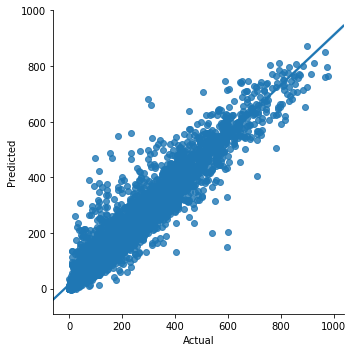

In [13]:
sns.lmplot(x='Actual',y='Predicted',data=results_df)